# Machine Learning
BDDMED
## 1. Business Requirement or understanding
This phase consists of a very precise specification of the problem together with methods of evaluating the achievement of the goal. This initial phase focuses on understanding the project objectives and requirements from a business perspective, then converting this knowledge into a data mining problem definition and a preliminary plan designed to achieve the objectives.


## 2. Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data or to detect interesting subsets to form hypotheses for hidden information.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('regression.csv')
df.head()

Year Month Cost Centre  Account Account Description Account Type    Amount
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328

In [3]:
df.tail()

Year Month Cost Centre  Account  Account Description Account Type  \
4207  2021   Dec       CC302  2000005            Purchases      Expense   
4208  2021   Dec       CC302  3000000         Cash at Bank        Asset   
4209  2021   Dec       CC302  3000001            Inventory        Asset   
4210  2021   Dec       CC302  3000002  Accounts Receivable        Asset   
4211  2021   Dec       CC302  4000001     Accounts Payable    Liability   

        Amount  
4207   698.121  
4208  -282.056  
4209   537.478  
4210  1152.680  
4211 -1020.000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [5]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [6]:
df.describe()

Year       Account       Amount
count  4212.000000  4.212000e+03  4212.000000
mean   2020.000000  2.076925e+06   476.470421
std       0.816594  9.167528e+05   477.296234
min    2019.000000  1.000000e+06 -1020.000000
25%    2019.000000  1.000004e+06   268.044500
50%    2020.000000  2.000002e+06   512.998500
75%    2021.000000  3.000000e+06   755.960250
max    2021.000000  4.000001e+06  2378.880000

In [7]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [8]:
df.describe(include='object')

Month Cost Centre Account Description Account Type
count   4212        4212                4212         4212
unique    12           9                  13            4
top      Jan       CC100       Product Sales      Expense
freq     351         468                 324         1620

### try test visualize data to understand it

<AxesSubplot:xlabel='Account Type', ylabel='Amount'>

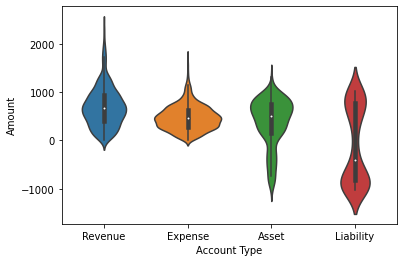

In [9]:
from matplotlib import pyplot as py
import seaborn as sbn

sbn.violinplot(x='Account Type', y='Amount', data=df)

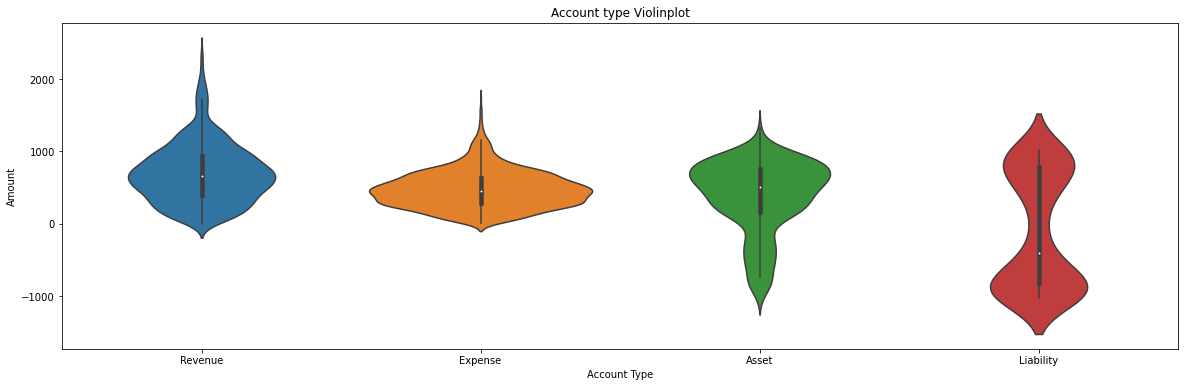

In [10]:
py.figure(figsize=(20,6))
sbn.violinplot(x='Account Type', y='Amount', data=df).set_title('Account type Violinplot')
py.show()

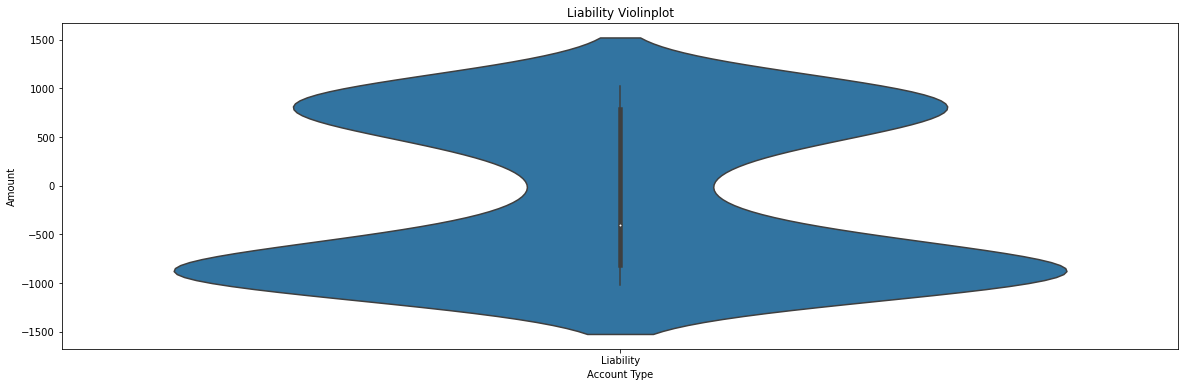

In [11]:
py.figure(figsize=(20,6))
sbn.violinplot(x='Account Type', y='Amount', data=df[df['Account Type'] == 'Liability']).set_title('Liability Violinplot')
py.show()

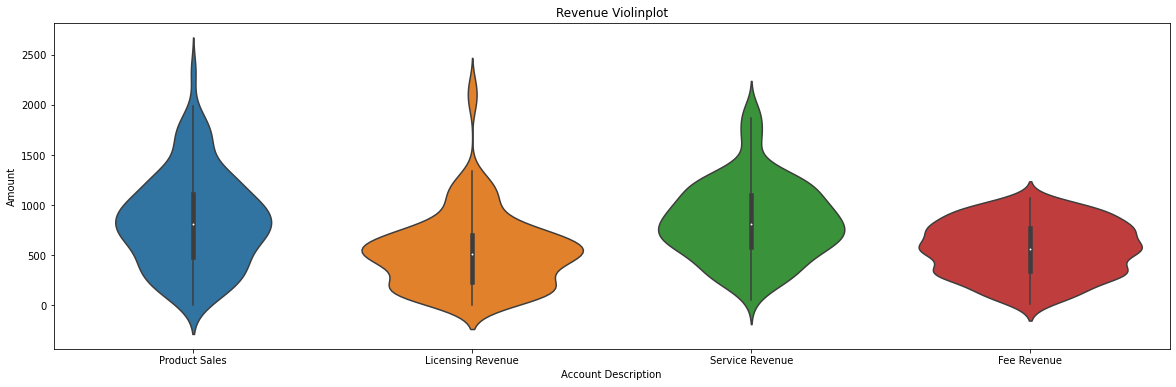

In [12]:
py.figure(figsize=(20,6))
sbn.violinplot(x='Account Description', y='Amount', data=df[df['Account Type'] == 'Revenue']).set_title('Revenue Violinplot')
py.show()

In [13]:
df.head()

Year Month Cost Centre  Account Account Description Account Type    Amount
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328

In [14]:
monthmap = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

In [15]:
monthmap['Feb']

2

In [16]:
# add a column period refleft to month
df['Bulan'] = df['Month'].apply(lambda x: monthmap[x])

In [18]:
df.head()

Year Month Cost Centre  Account Account Description Account Type    Amount  \
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051   
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968   
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820   
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360   
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328   

   Bulan  
0      1  
1      1  
2      1  
3      1  
4      1

In [19]:
df.tail()

Year Month Cost Centre  Account  Account Description Account Type  \
4207  2021   Dec       CC302  2000005            Purchases      Expense   
4208  2021   Dec       CC302  3000000         Cash at Bank        Asset   
4209  2021   Dec       CC302  3000001            Inventory        Asset   
4210  2021   Dec       CC302  3000002  Accounts Receivable        Asset   
4211  2021   Dec       CC302  4000001     Accounts Payable    Liability   

        Amount  Bulan  
4207   698.121     12  
4208  -282.056     12  
4209   537.478     12  
4210  1152.680     12  
4211 -1020.000     12

In [20]:
df[df['Month'] == 'Sep'].head()

Year Month Cost Centre  Account Account Description Account Type  \
936  2019   Sep       CC100  1000000       Product Sales      Revenue   
937  2019   Sep       CC100  1000001   Licensing Revenue      Revenue   
938  2019   Sep       CC100  1000002     Service Revenue      Revenue   
939  2019   Sep       CC100  1000004         Fee Revenue      Revenue   
940  2019   Sep       CC100  2000000   Cost of Good Sold      Expense   

      Amount  Bulan  
936  925.275      9  
937  235.756      9  
938  687.010      9  
939  822.053      9  
940  552.245      9

In [21]:
df['Day'] = 1

In [22]:
df.head()

Year Month Cost Centre  Account Account Description Account Type    Amount  \
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051   
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968   
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820   
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360   
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328   

   Bulan  Day  
0      1    1  
1      1    1  
2      1    1  
3      1    1  
4      1    1

In [25]:
# combine the column attributes to be the attribute date column and convert it to date
df['Date'] = df['Day'].astype(str) + '-' + df['Bulan'].astype(str) + '-' + df['Year'].astype(str) 

In [26]:
df.head()

Year Month Cost Centre  Account Account Description Account Type    Amount  \
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051   
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968   
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820   
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360   
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328   

   Bulan  Day      Date  
0      1    1  1-1-2019  
1      1    1  1-1-2019  
2      1    1  1-1-2019  
3      1    1  1-1-2019  
4      1    1  1-1-2019

In [27]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
Bulan                    int64
Day                      int64
Date                    object
dtype: object

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Bulan                           int64
Day                             int64
Date                   datetime64[ns]
dtype: object

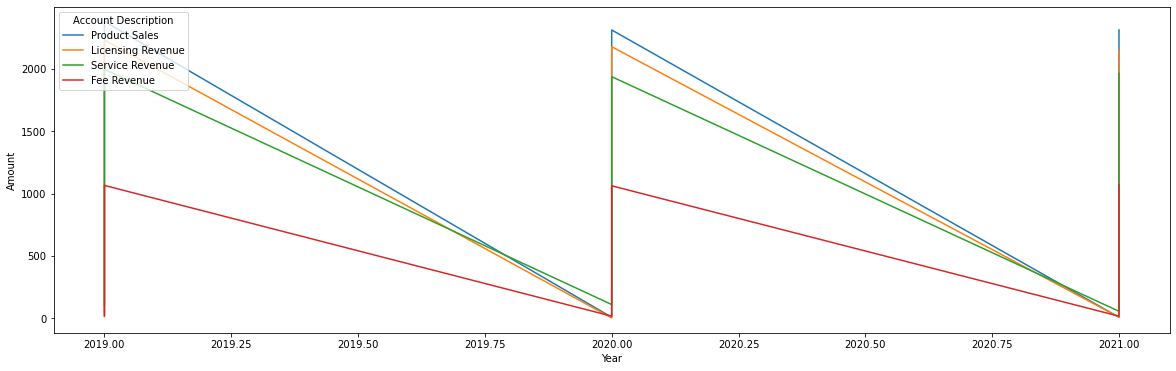

In [32]:
py.figure(figsize=(20,6))
sbn.lineplot(x='Year', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type'] == 'Revenue'])
py.show()

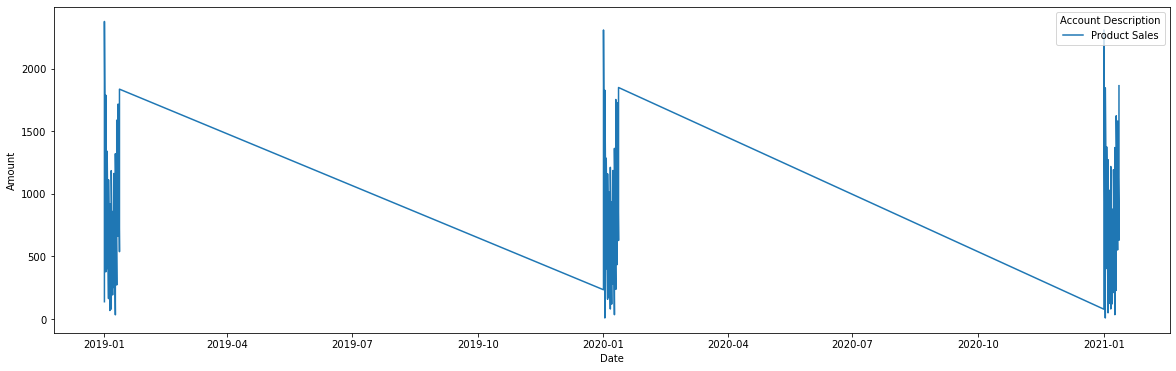

In [33]:
py.figure(figsize=(20,6))
sbn.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description'] == 'Product Sales'])
py.show()